<a href="https://colab.research.google.com/github/ShubhamPashilkar/Cardekho_ML_Project1-Linear-Regression/blob/main/Car_Dekho_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

#Objective:

---

Our main motive is to find the selling price of car on CarDekho.com.




In [ ]:
#Importing basic libraries

import numpy as np
import pandas as pd
from numpy import math

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Connect with Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading Dataset

cardekho = pd.read_csv('/content/drive/MyDrive/CAR DETAILS FROM CAR DEKHO.csv')

In [ ]:
# First look

cardekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
cardekho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
cardekho.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


In [ ]:
# duplicate

cardekho.duplicated().value_counts()

False    3577
True      763
dtype: int64

As we can see we have some duplicate record in our dataset and we need to drop that record from our dataset. As duplicate record doesn't give any further information about anything which will be usefull for our model as we have same recored in our dataset.

In [ ]:
cardekho.drop_duplicates(keep='first', inplace=True)

cardekho.reset_index(inplace=True)


In [ ]:
cardekho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577 entries, 0 to 3576
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          3577 non-null   int64 
 1   name           3577 non-null   object
 2   year           3577 non-null   int64 
 3   selling_price  3577 non-null   int64 
 4   km_driven      3577 non-null   int64 
 5   fuel           3577 non-null   object
 6   seller_type    3577 non-null   object
 7   transmission   3577 non-null   object
 8   owner          3577 non-null   object
dtypes: int64(4), object(5)
memory usage: 251.6+ KB


In [ ]:
cardekho.columns

Index(['level_0', 'name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner', 'Car Age'],
      dtype='object')

In [ ]:
cardekho= cardekho.drop('level_0', axis=1)

In [ ]:
cardekho.head()

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


We have a good analysis for our numerical columns which gives us the count, mean and other values to have a clear idea of the values in our dataset. 
<br>So, Lets start our EDA with Numerical data.

# **Exploratory Data Analysis**

---



Text(0.5, 0, 'Selling Price')

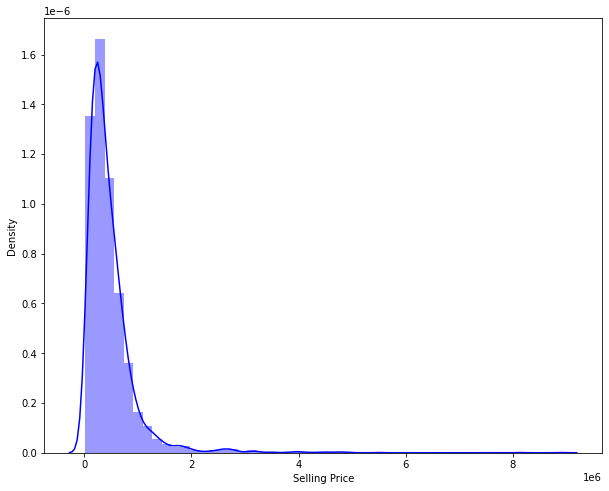

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot((cardekho['selling_price']),color='b')
plt.xlabel('Selling Price')

From the above graph we can see that as our price is moving towards y-axis and we couldn't get any better visualziation with these type of graph.
<br>So, its better to take log of the dependent variable to draw the graph to have better visualization.

Text(0.5, 0, 'Selling Price')

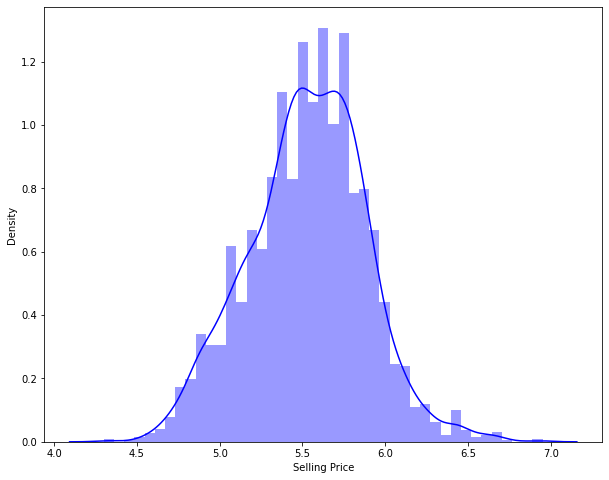

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(np.log10(cardekho['selling_price']),color='b')
plt.xlabel('Selling Price')

Now we see that this graph looks like a normal distribution than above one.

In [ ]:
Numeric_features = cardekho.describe().columns
Numeric_features

Index(['year', 'selling_price', 'km_driven', 'Car Age'], dtype='object')

<br>Now let's use scatter plot between independent and dependent variables to determine their relationship.

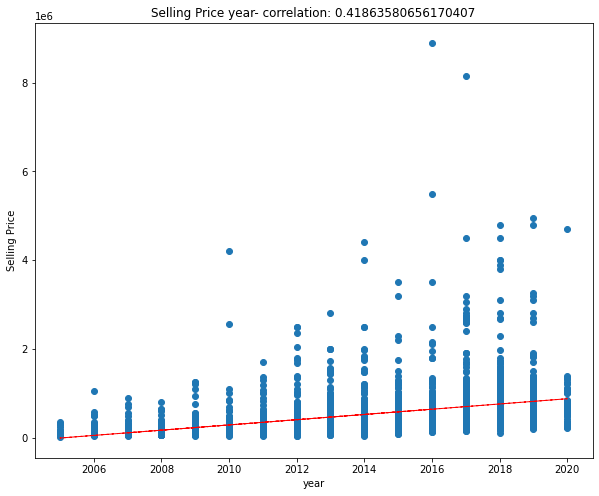

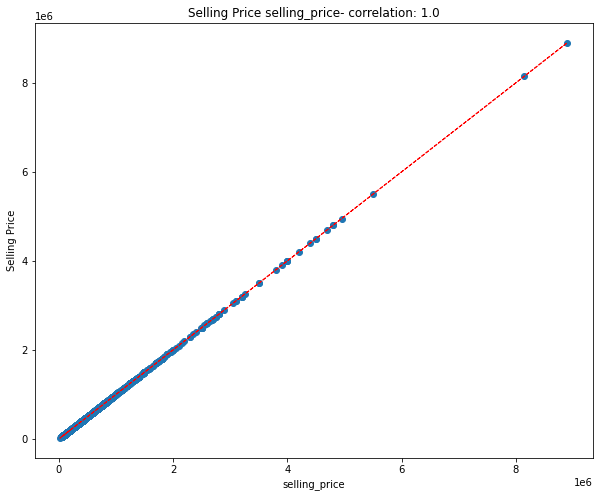

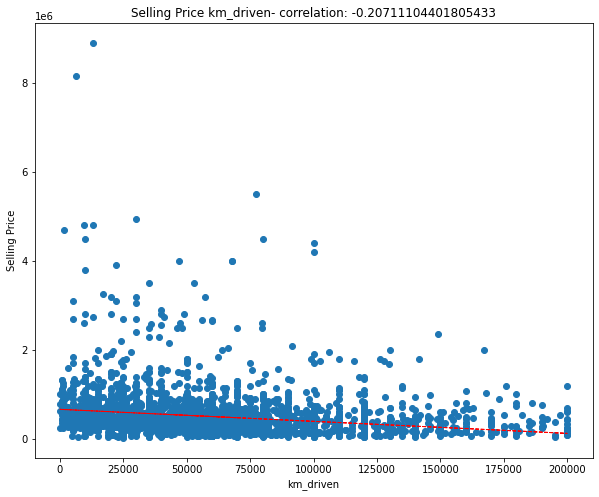

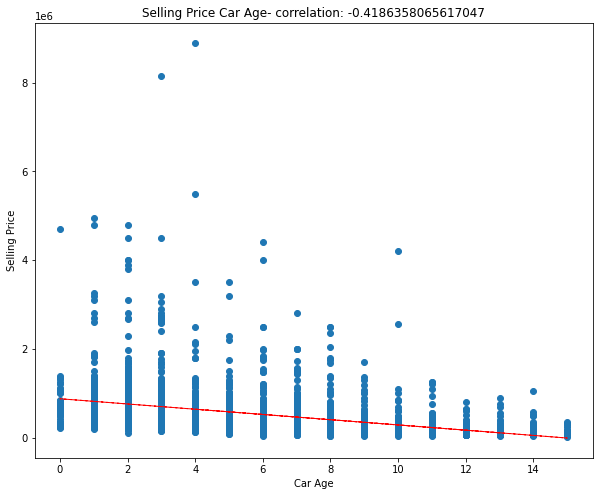

In [ ]:
for col in Numeric_features:
   fig = plt.figure(figsize=(10,8))
   ax = fig.gca()
   feature = cardekho[col]
   label = cardekho['selling_price']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
   plt.ylabel('Selling Price')
   ax.set_title('Selling Price ' + col + '- correlation: ' + str(correlation))
   z = np.polyfit(cardekho[col], cardekho['selling_price'], 1)
   y_hat = np.poly1d(z)(cardekho[col])
 
   plt.plot(cardekho[col], y_hat, "r--", lw=1)
 
plt.show()

From above we can see that most of the car have driven less the 200000 km and for the Year column we can keep the data for last 15 year from which we can make a good model.

### **Let's try to remove outlier(Unwanted or Extra which makes our dataset quiet unwell) from our dataset.**

---
Let's keep the data only for last 15 year that is between 2005 to 2020. and KM_driven is less then 200000.


In [ ]:
cardekho= cardekho[cardekho['year'] >= 2005]

cardekho= cardekho[cardekho['km_driven'] <= 200000]

cardekho.reset_index(inplace=True)

In [ ]:
cardekho.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Car Age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,13
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,13
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,8
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,3
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,6


Let's plot one more time scatter plot to see the difference.

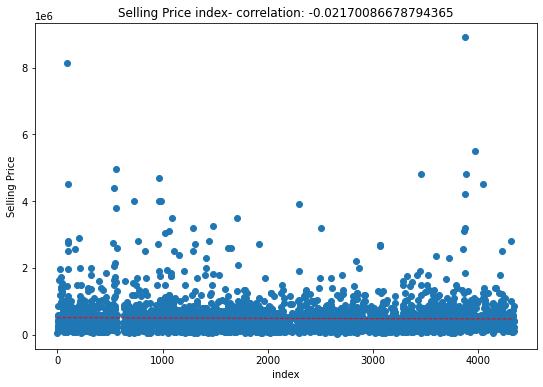

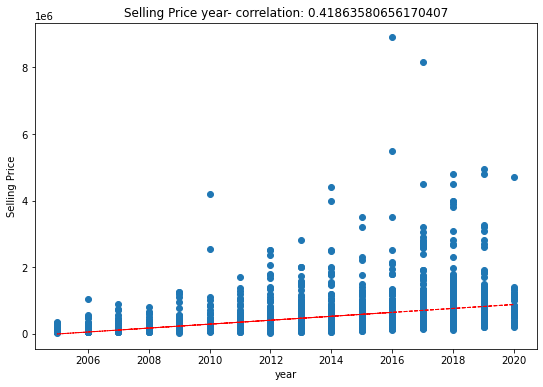

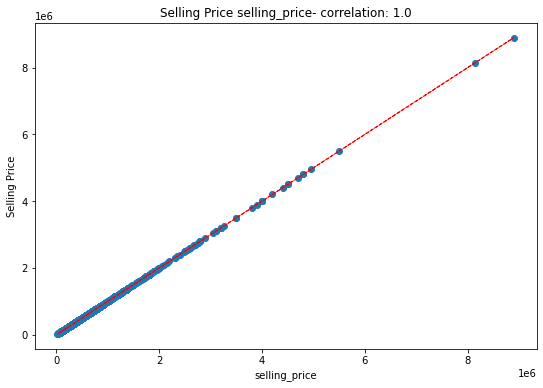

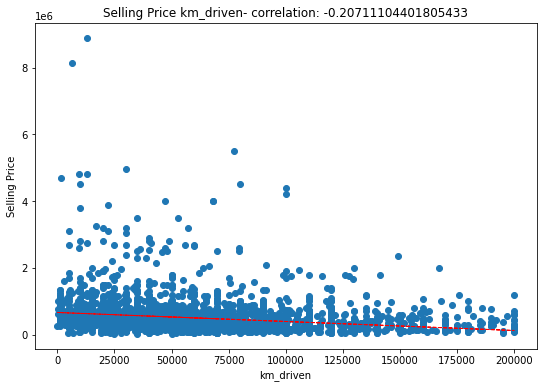

In [ ]:
for col in Numeric_features:
   fig = plt.figure(figsize=(9, 6))
   ax = fig.gca()
   feature = cardekho[col]
   label = cardekho['selling_price']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
   plt.ylabel('Selling Price')
   ax.set_title('Selling Price ' + col + '- correlation: ' + str(correlation))
   z = np.polyfit(cardekho[col], cardekho['selling_price'], 1)
   y_hat = np.poly1d(z)(cardekho[col])
 
   plt.plot(cardekho[col], y_hat, "r--", lw=1)
 
plt.show()


After removing outlier we are getting our scatter plot in a quiet well manner now we can find out the relation between them.
<br>Here we cay say that:
* If the KM_driven is less then price will be high for the car.
* If the car is too old then it will be relativily cheap then latest one.

Now let's try to  find and remove the multicollinearity from our dataset and also find some correlation between numerical data.


In [ ]:
#Removing multicollinear

cardekho['Car Age']= 2020 - cardekho['year']

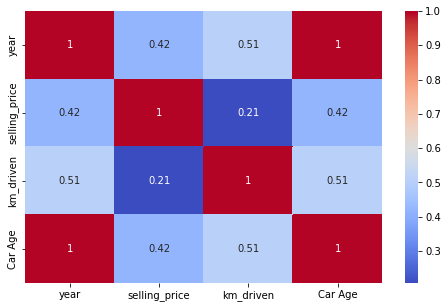

In [ ]:
# Correlation
plt.figure(figsize=(8,5))
correlation = cardekho.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

From above It's clear that car price Car Age and Year is have same strong relation(1) i.e. they can provide same info.
<br> So we can remove year column from our dataset.
<br> KM_driven has an average relation so we can keep that variable for our model.

In [ ]:
#Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [ ]:
calc_vif(cardekho[[i for i in cardekho.describe().columns if i not in ['year','selling_price']]])

,variables,VIF
0,km_driven,4.2816
1,Car Age,4.2816


The VIF we are getting is good to perform our linear regression.

In [ ]:
numerical_features = ['km_driven','Car Age']

In [ ]:
cardekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Car Age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,13
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,13
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,8
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,3
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,6


In [ ]:
cardekho['name'].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [ ]:
cardekho['company'] = cardekho['name'].str.split(" ", expand=True)[0]
cardekho['company'] = cardekho['company'].replace({'toyouta': 'Toyota','vw':'Volkswagen','vokswagen':'Volkswagen',
                                                      'maxda':'Mazda','porcshce':'Porsche','Bmw' : 'BMW','Mg' : 'MG'})
cardekho['company'] = cardekho['company'].str.title()
cardekho['company'].value_counts()

Maruti           993
Hyundai          614
Mahindra         300
Tata             299
Ford             215
Honda            207
Toyota           154
Chevrolet        150
Renault          110
Volkswagen        92
Nissan            52
Skoda             46
Audi              31
Fiat              30
Datsun            29
Bmw               25
Mercedes-Benz     19
Jaguar             5
Mitsubishi         5
Land               5
Volvo              4
Jeep               3
Mg                 2
Ambassador         2
Force              1
Isuzu              1
Kia                1
Name: company, dtype: int64

In [ ]:
cardekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Car Age,company
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,13,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,13,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,8,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,3,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,6,Honda


# Analysis of Categorical Data

In [ ]:
categorical_features = cardekho.describe(include=['object','category']).columns
categorical_features

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'company'], dtype='object')

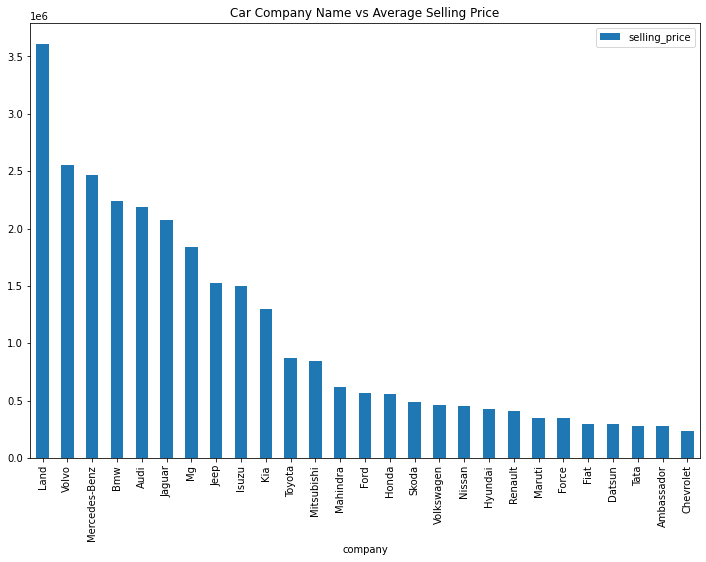

In [ ]:
# Average selling price of different car companies:

car_sp = pd.DataFrame(cardekho.groupby(['company'])['selling_price'].mean().sort_values(ascending = False))

car_sp.plot.bar(figsize=(12,8), title= 'Car Company Name vs Average Selling Price')
plt.show()

In [ ]:
car_sp.rename(columns={'selling_price':'Average_Selling_Price'},inplace=True)

In [ ]:
cardekho = cardekho.merge(car_sp,on = 'company',how = 'left')

In [ ]:
cardekho['Company_Category'] = cardekho['Average_Selling_Price'].apply(lambda x : 0 if x < 400000 else (1 if 400000 <= x < 700000 else 2))

In [ ]:
cardekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Car Age,company,Average_Selling_Price,Company_Category
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,13,Maruti,350566.930514,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,13,Maruti,350566.930514,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,8,Hyundai,423908.747557,1
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,3,Datsun,296551.655172,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,6,Honda,557067.584541,1


# Data Preparation

---



In [ ]:
cardekho.shape

(3395, 12)

In [ ]:
cardekho1= cardekho.copy()

In [ ]:
cardekho1.shape

(3395, 12)

## **Feature Engineering**

---
Let's convert categorical features to numeric.


In [ ]:
### Data encoding

encoders_nums = {"owner":
                {"Test Drive Car":4,"First Owner":0,"Second Owner":1,"Third Owner":2,"Fourth & Above Owner":3},
                 }

cardekho1 = cardekho1.replace(encoders_nums)

In [ ]:
# One hot encoding
cardekho1 = pd.get_dummies(cardekho1, columns=["fuel"], prefix=["Fuel_Type"])
cardekho1 = pd.get_dummies(cardekho1, columns=["seller_type",'transmission'],prefix=["Seller_Type","Transmission"])

In [ ]:
cardekho1.head(5)

,name,year,selling_price,km_driven,owner,Car Age,company,Average_Selling_Price,Company_Category,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Automatic,Transmission_Manual
0,Maruti 800 AC,2007,60000,70000,0,13,Maruti,350566.930514,0,0,0,0,0,1,0,1,0,0,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,13,Maruti,350566.930514,0,0,0,0,0,1,0,1,0,0,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,8,Hyundai,423908.747557,1,0,1,0,0,0,0,1,0,0,1
3,Datsun RediGO T Option,2017,250000,46000,0,3,Datsun,296551.655172,0,0,0,0,0,1,0,1,0,0,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,6,Honda,557067.584541,1,0,1,0,0,0,0,1,0,0,1


With the help of one  hot coding

*   Fuel type attribute  is divided into 5 new attributes.
*   Transmission attribute is divided into 2 new attributes.
*   Seller_Type attribute is is divided into 2 new attributes.


In [ ]:
cardekho1.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'owner', 'Car Age',
       'company', 'Average_Selling_Price', 'Company_Category', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Seller_Type_Dealer', 'Seller_Type_Individual',
       'Seller_Type_Trustmark Dealer', 'Transmission_Automatic',
       'Transmission_Manual'],
      dtype='object')

In [ ]:
features = numerical_features.copy()

In [ ]:
features.extend(['owner','Company_Category','Average_Selling_Price', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Seller_Type_Dealer', 'Seller_Type_Individual',
       'Seller_Type_Trustmark Dealer', 'Transmission_Automatic',
       'Transmission_Manual'])

In [ ]:
features

['km_driven',
 'Car Age',
 'owner',
 'Company_Category',
 'Average_Selling_Price',
 'Fuel_Type_CNG',
 'Fuel_Type_Diesel',
 'Fuel_Type_Electric',
 'Fuel_Type_LPG',
 'Fuel_Type_Petrol',
 'Seller_Type_Dealer',
 'Seller_Type_Individual',
 'Seller_Type_Trustmark Dealer',
 'Transmission_Automatic',
 'Transmission_Manual']

In [ ]:
# Define input and output variables:

from scipy.stats import zscore

X = cardekho1[features].apply(zscore)

y = np.log10(cardekho1['selling_price'])

# **Implementing Linear Regression**

---
Let's now begin to train our regression model.
<br> We need to first split up our data into train array that contains the part of dataset used for training data and test array used for test data.


In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(2716, 15)
(679, 15)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

lr = LinearRegression()
lr.fit(X_train, y_train)

print("Training")
print(lr.score(X_train,y_train))

print("Testing")
print(lr.score(X_test,y_test))

print(lr.coef_)
print(lr.intercept_)

predicted = lr.predict(X_test)

Training
0.7460217021888438
Testing
0.7707684391184333
[-1.86846024e-02 -1.88011308e-01 -1.43089389e-02  5.92079929e-02
  7.83931688e-02 -8.82939824e-03  4.43356304e-02 -6.93889390e-18
 -9.57482019e-03 -4.11235425e-02  5.74449694e-03 -9.11053521e-03
  1.43491017e-02  2.07000204e-02 -2.07000204e-02]
5.54994802959964


In [ ]:
# Using GradientBoostingRegressor:

pipe = Pipeline((
("sc",StandardScaler()),
("lr", GradientBoostingRegressor()),
))
pipe.fit(X_train,y_train)

print("Training")
print(pipe.score(X_train,y_train))
print("Testing")
print(pipe.score(X_test,y_test))

Training
0.8054991860561815
Testing
0.792173060992324


We can see that using Scaling and Gradient boosting we can achieve better results.

## **Regression Evaluation Metrics**

---


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:

1n∑i=1n|yi−y^i| 
 
**Mean Squared Error (MSE)** is the mean of the squared errors:

1n∑i=1n(yi−y^i)2
 
Root Mean Squared Error (RMSE) **bold text** is the square root of the mean of the squared errors:

1n∑i=√1n(yi−y^i)2
 
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
<br>MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
<br>RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
<br>All of these are loss functions, because we want to minimize them.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

MSE= mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

MAE= mean_absolute_error(10**(y_test), 10**(y_pred))
print("MAE :" ,MAE)

RMSE= np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2= r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)

MSE : 62036179046.59366
MAE : 146270.80755726938
RMSE : 249070.63063836662
R2 : 0.7580137264526585


# **Residuals:**

---


Text(0.5, 0.98, 'Residual Analysis')

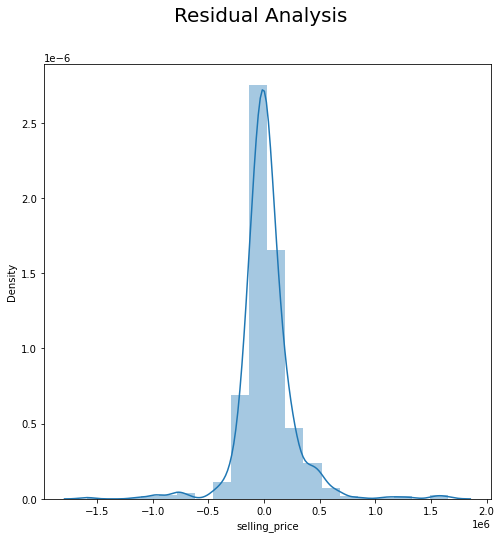

In [ ]:
fig=plt.figure(figsize=(8,8))
  
sns.distplot((10**(y_test)- 10**(y_pred)),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

# **Implementing Lasso regression**

---
Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.005 , max_iter= 500)

lasso.fit(X_train, y_train)

print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7447902115055101
0.7712680730459011


In [ ]:
y_pred_l = lasso.predict(X_test)

In [ ]:
MSE= mean_squared_error(10**(y_test), 10**(y_pred_l))
print("MSE :" , MSE)

MAE= mean_absolute_error(10**(y_test), 10**(y_pred_l))
print("MAE :" ,MAE)

RMSE= np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2= r2_score(10**(y_test), 10**(y_pred_l))
print("R2 :" ,r2)

MSE : 59947897893.12127
MAE : 144033.9490854695
RMSE : 244842.5981995806
R2 : 0.7661595436550428


Text(0.5, 0.98, 'Residual Analysis')

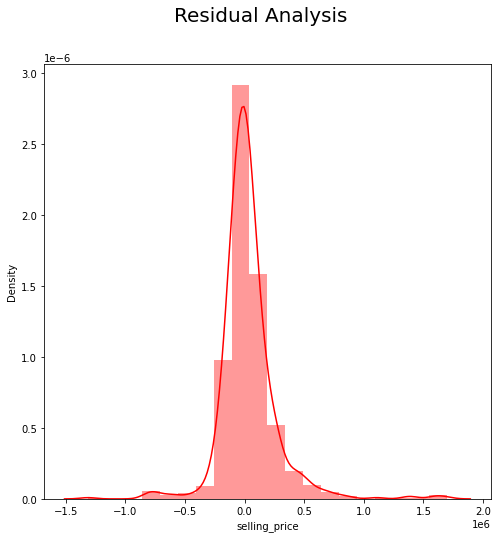

In [ ]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot((10**(y_test)- 10**(y_pred_l)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

## **Implementing Cross-Validation Procedure for Lasso**

---



In [ ]:
# Cross validation

from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=4)
lasso_regressor.fit(X_train, y_train)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -0.029346408730421356


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
MSE= mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

MAE= mean_absolute_error(10**(y_test), 10**(y_pred_lasso))
print("MAE :" ,MAE)

RMSE= np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2= r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)

MSE : 61365877719.64536
MAE : 145556.6583598306
RMSE : 247721.37114033048
R2 : 0.7606283897468022


Text(0.5, 0.98, 'Residual Analysis')

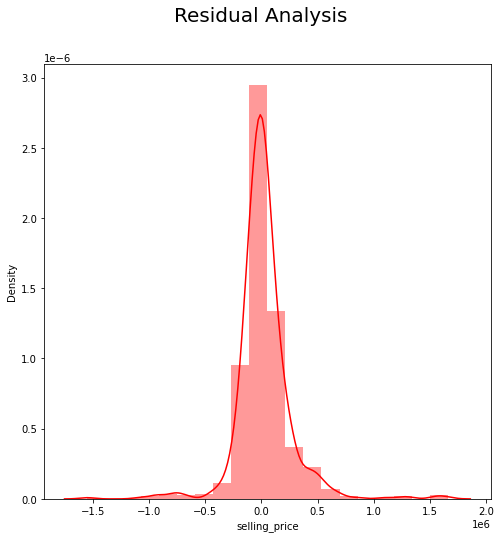

In [ ]:
#Resuldual Analysis

fig=plt.figure(figsize=(8,8))
  
sns.distplot((10**(y_test)- 10**(y_pred_lasso)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   


**<br>Implementing Ridge Regression**
---
Ridge regression is a way to create a parsimonious model when the number of predictor variables in a set exceeds the number of observations, or when a data set has multicollinearity (correlations between predictor variables).


In [ ]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.7460217015531888
0.7707686947559732


In [ ]:
y_pred_r = ridge.predict(X_test)

In [ ]:
MSE= mean_squared_error(10**(y_test), 10**(y_pred_r))
print("MSE :" , MSE)

MAE= mean_absolute_error(10**(y_test), 10**(y_pred_r))
print("MAE :" ,MAE)

RMSE= np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2= r2_score(10**(y_test), 10**(y_pred_r))
print("R2 :" ,r2)

MSE : 61982766339.23467
MAE : 145995.40453021642
RMSE : 248963.383531062
R2 : 0.7582220749069398


Text(0.5, 0.98, 'Residual Analysis')

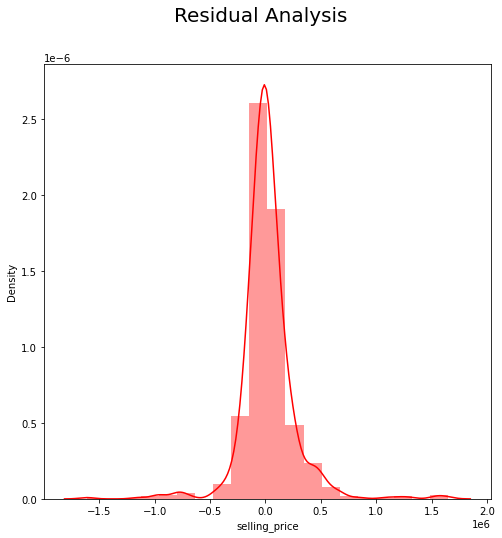

In [ ]:
#Resuldual Analysis

fig=plt.figure(figsize=(8,8))
  
sns.distplot((10**(y_test)- 10**(y_pred_r)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

## Running Grid Search Cross Validation for Ridge Regression

---



In [ ]:
# Hyperprarameter tuning

ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}

ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.029408608138141886


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
MSE= mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

MAE= mean_absolute_error(10**(y_test), 10**(y_pred_ridge))
print("MAE :" ,MAE)

RMSE= np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2= r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)

MSE : 61985423632.18315
MAE : 145996.70255461292
RMSE : 248968.72018826613
R2 : 0.7582117095293778


Text(0.5, 0.98, 'Residual Analysis')

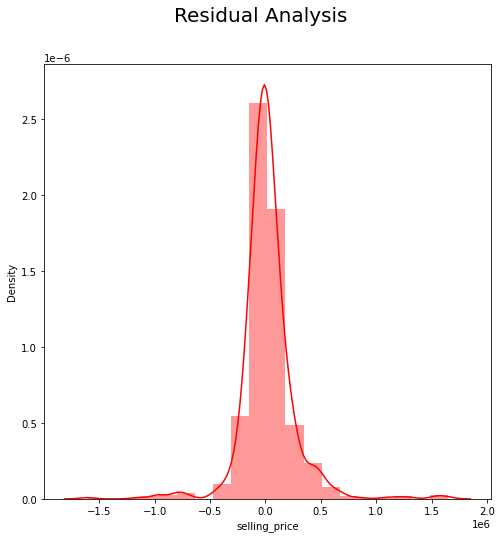

In [ ]:
#Resuldual Analysis

fig=plt.figure(figsize=(8,8))
  
sns.distplot((10**(y_test)- 10**(y_pred_ridge)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

# **Conclusion**



---
From above model we can conclude:

*  Automatic vehicles fetch higher resale price compared to manual ones.
*  Age of the vehicle seems to show negative correlation with selling price.
* Past_Owners and Kms_Driven are showing very less correlation with selling price.
*  Resale value of cars with Fuel type CNG is higher as comapre to other.
* Average price of a car directly influences Selling Price prediction, both are highly correlated and here directly proportional to each other.

